In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import googletrans
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("../data/dataset/dataset.csv", sep=';', encoding="ISO-8859-1")
dataset

,Tweet,label
0,"Min, normal ke kalau iPhone 11/11 Pro /Pro Max...",baterai negatif
1,Kmera iphone 11 mmeng beda,kamera positif
2,Iphone 11 pro max kamera depannya jelek ye? Gu...,kamera negatif
3,Apple meluncurkan iPhone 11 dengan peningkatan...,baterai positif
4,"xs max, senderrr. tapi rugi sih kalo kamu beli...","spesifikasi positif,harga positif"
...,...,...
743,ga keren banget masa charger bawaannya belum f...,baterai negatif
744,"yaelah belum fast charging, lama nih kalo ngec...",baterai negatif
745,butuh waku lama buat ngecharge kalo pake charg...,baterai negatif
746,udah mahal begini masa chargernya blm fast cha...,baterai negatif


In [3]:
label_size0 = []
label_size1 = []
label_size2 = []
label_size3 = []
label_size4 = []
label_size5 = []
label_size6 = []
label_size7 = []
label_size8 = []
label_size9 = []

for i in dataset.columns[1:]:
    label_size0.append(len(dataset[dataset[i]=='kamera positif']))
    label_size1.append(len(dataset[dataset[i]=='kamera negatif']))
    label_size2.append(len(dataset[dataset[i]=='baterai positif']))
    label_size3.append(len(dataset[dataset[i]=='baterai negatif']))
    label_size4.append(len(dataset[dataset[i]=='spesifikasi positif']))
    label_size5.append(len(dataset[dataset[i]=='spesifikasi negatif']))
    label_size6.append(len(dataset[dataset[i]=='harga positif']))
    label_size7.append(len(dataset[dataset[i]=='harga negatif']))
    label_size8.append(len(dataset[dataset[i]=='general positif']))
    label_size9.append(len(dataset[dataset[i]=='general negatif']))

In [5]:
dat_anls_kamera = pd.DataFrame({
    'label' : dataset.columns[1:],
    'positif' : label_size0,
    'negatif' : label_size1
})

dat_anls_kamera = dat_anls_kamera.set_index(['label'], drop=True)

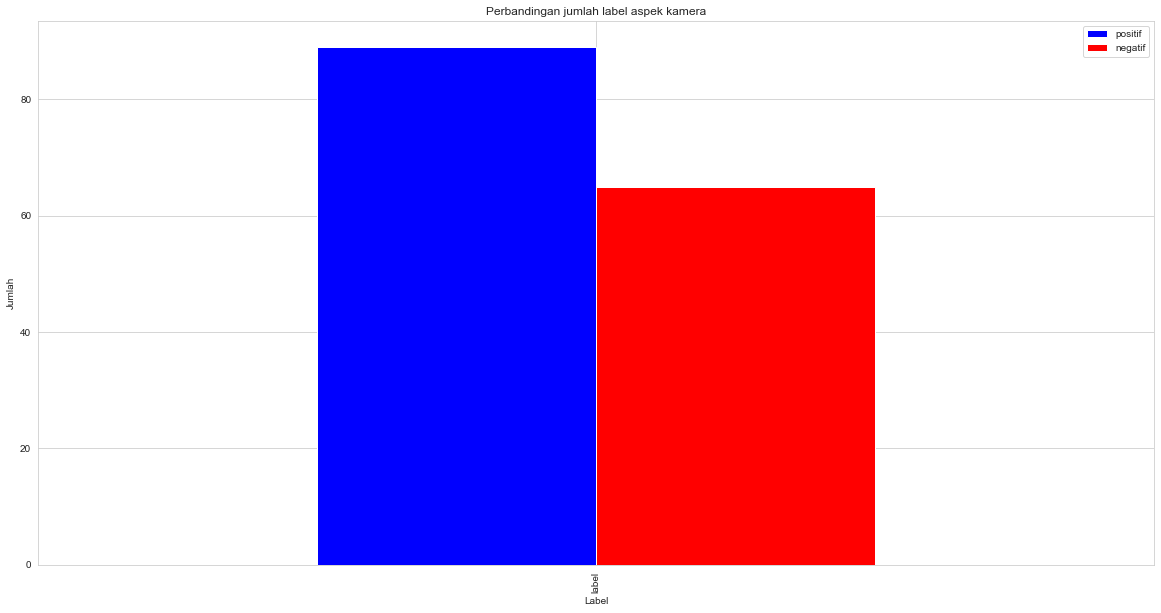

In [8]:
dat_anls_kamera.loc[:,['positif','negatif']].plot.bar(color=['blue','red'], figsize=(20,10))
plt.title("Perbandingan jumlah label aspek kamera")
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()